## Cross Validation - Car Sales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from scipy import stats

In [2]:
data = pd.read_csv('./Car_sales.csv')

In [3]:
data

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [5]:
data.shape

(157, 16)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_in_thousands,157.0,52.998076,68.029422,0.110000,14.114000,29.450000,67.956000,540.561000
__year_resale_value,121.0,18.072975,11.453384,5.160000,11.260000,14.180000,19.875000,67.550000
Price_in_thousands,155.0,27.390755,14.351653,9.235000,18.017500,22.799000,31.947500,85.500000
Engine_size,156.0,3.060897,1.044653,1.000000,2.300000,3.000000,3.575000,8.000000
Horsepower,156.0,185.948718,56.700321,55.000000,149.500000,177.500000,215.000000,450.000000
Wheelbase,156.0,107.487179,7.641303,92.600000,103.000000,107.000000,112.200000,138.700000
Width,156.0,71.150000,3.451872,62.600000,68.400000,70.550000,73.425000,79.900000
Length,156.0,187.343590,13.431754,149.400000,177.575000,187.900000,196.125000,224.500000
Curb_weight,155.0,3.378026,0.630502,1.895000,2.971000,3.342000,3.799500,5.572000
Fuel_capacity,156.0,17.951923,3.887921,10.300000,15.800000,17.200000,19.575000,32.000000


In [7]:
data.isnull().mean()*100

Manufacturer            0.000000
Model                   0.000000
Sales_in_thousands      0.000000
__year_resale_value    22.929936
Vehicle_type            0.000000
Price_in_thousands      1.273885
Engine_size             0.636943
Horsepower              0.636943
Wheelbase               0.636943
Width                   0.636943
Length                  0.636943
Curb_weight             1.273885
Fuel_capacity           0.636943
Fuel_efficiency         1.910828
Latest_Launch           0.000000
Power_perf_factor       1.273885
dtype: float64

In [8]:
for i in data.columns:
    if data[i].dtype!='object':
        data[i].interpolate(inplace=True)

In [9]:
data.isnull().mean()*100

Manufacturer           0.0
Model                  0.0
Sales_in_thousands     0.0
__year_resale_value    0.0
Vehicle_type           0.0
Price_in_thousands     0.0
Engine_size            0.0
Horsepower             0.0
Wheelbase              0.0
Width                  0.0
Length                 0.0
Curb_weight            0.0
Fuel_capacity          0.0
Fuel_efficiency        0.0
Latest_Launch          0.0
Power_perf_factor      0.0
dtype: float64

In [10]:
data.rename(columns={'__year_resale_value':'year_sale_value'},inplace=True)

In [11]:
data.sample()

,Manufacturer,Model,Sales_in_thousands,year_sale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
36,Dodge,Avenger,4.734,12.545,Passenger,19.045,2.5,163.0,103.7,69.1,190.2,2.879,15.9,24.0,7/1/2012,65.650508


### Univariate Analysis

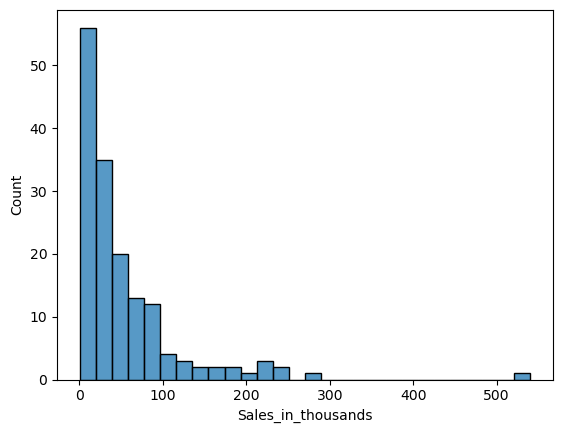

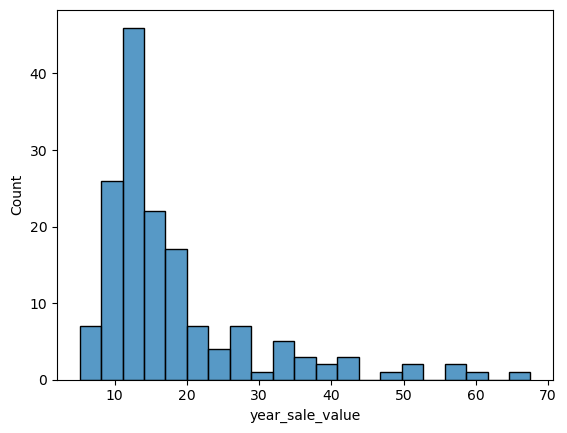

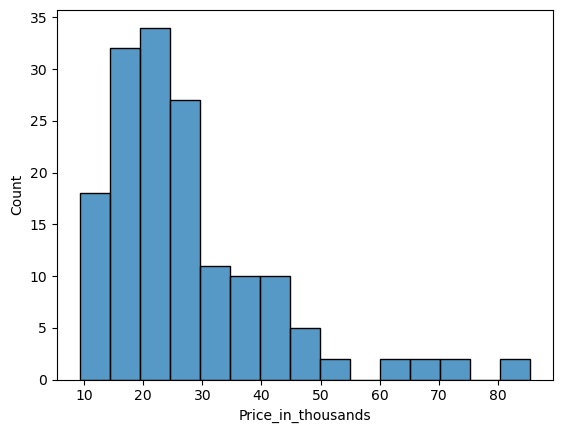

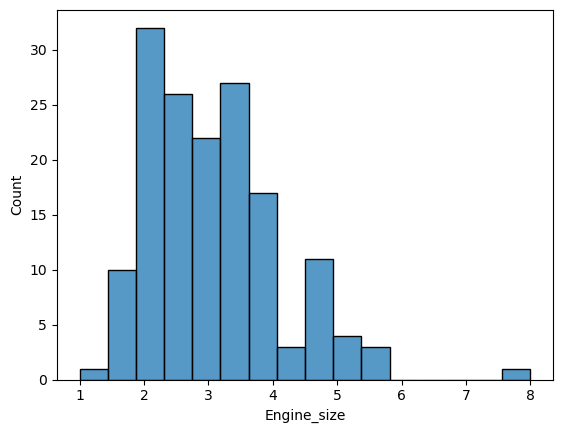

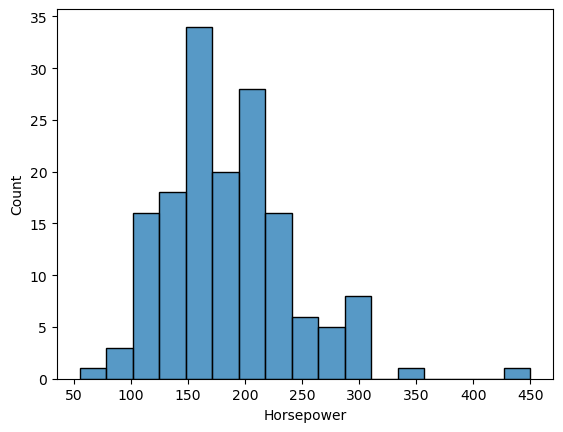

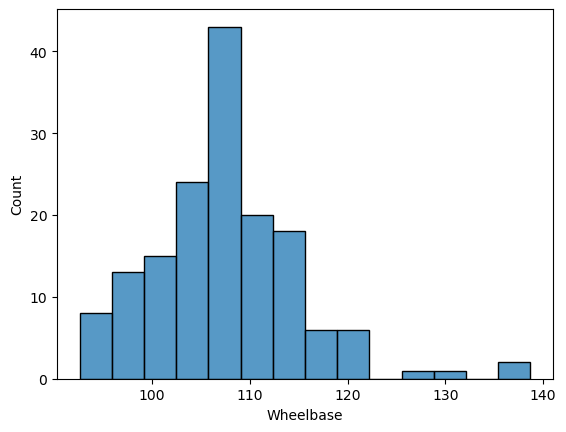

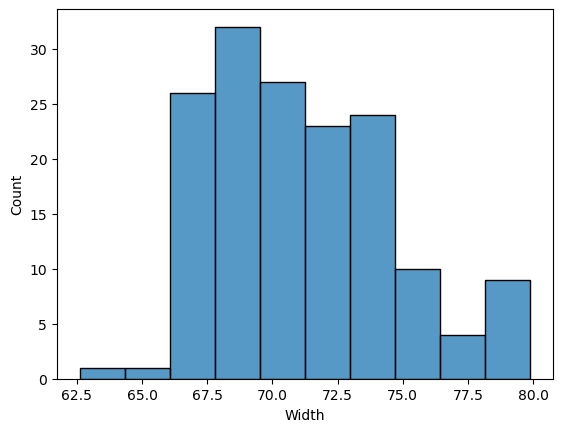

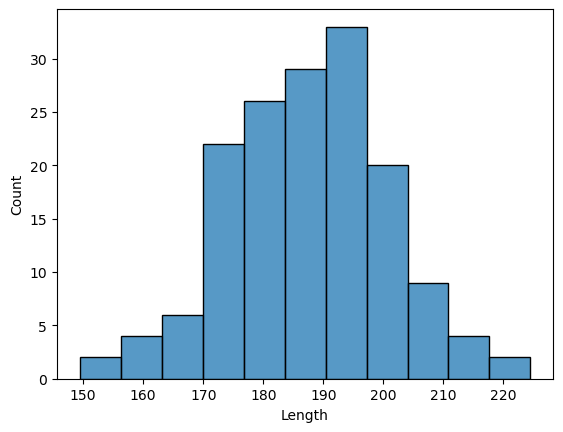

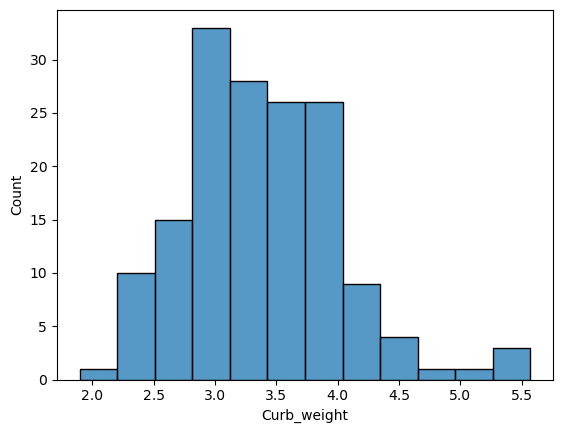

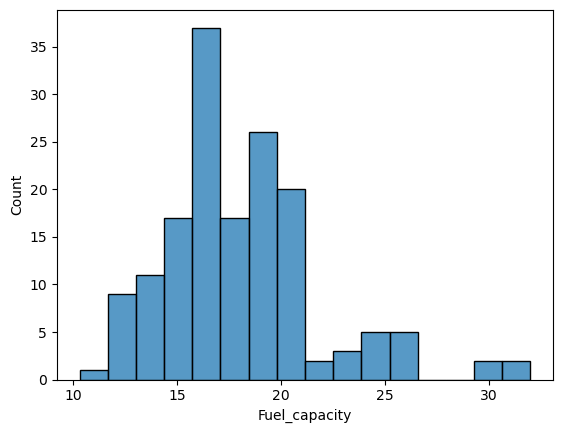

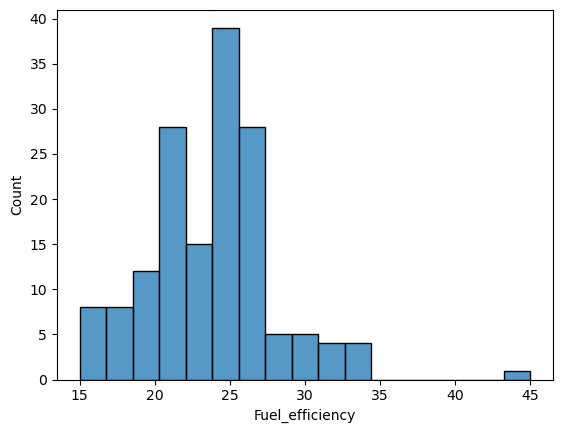

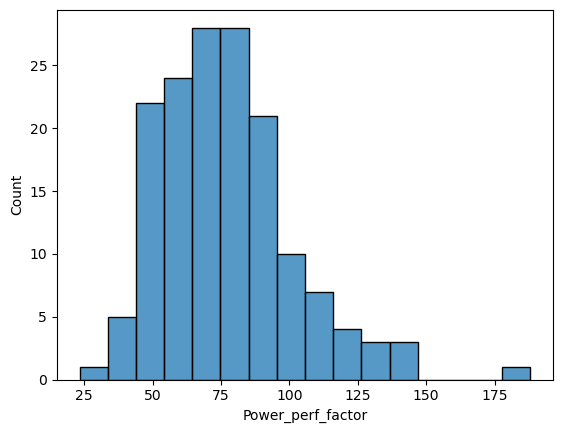

In [12]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.histplot(x=data[i])
        plt.show()

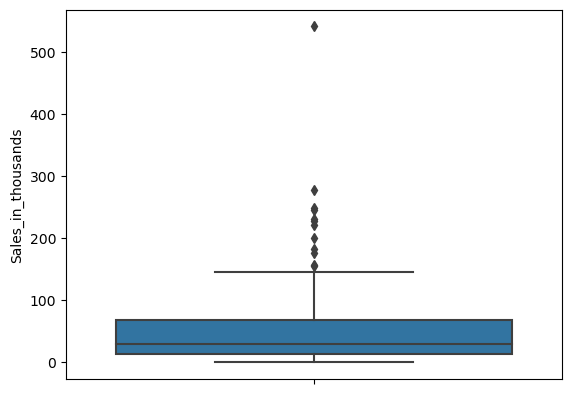

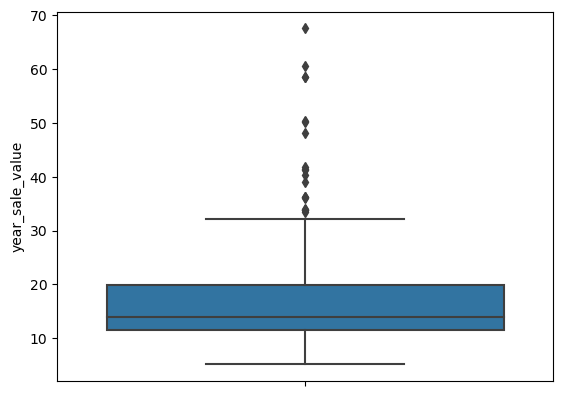

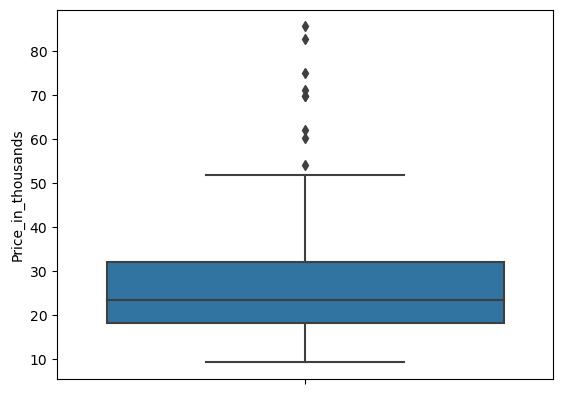

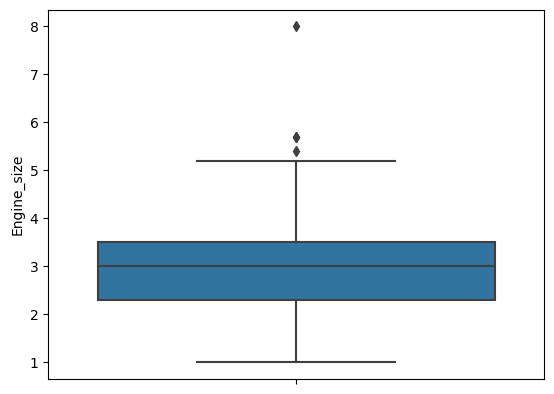

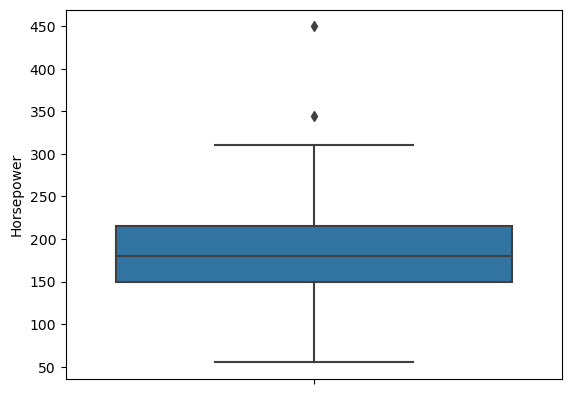

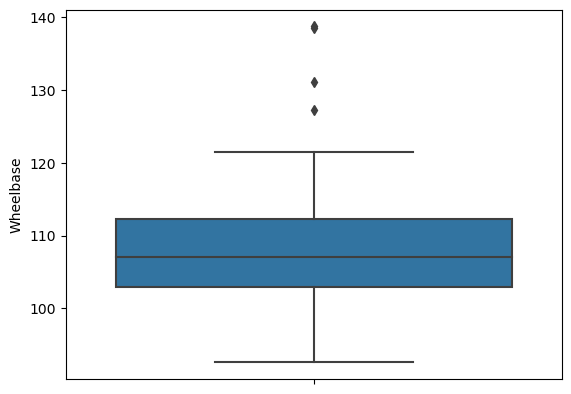

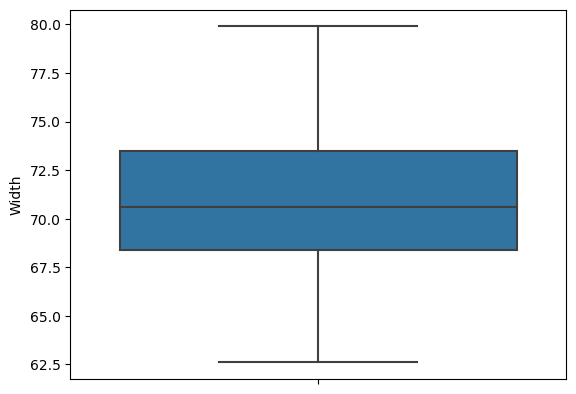

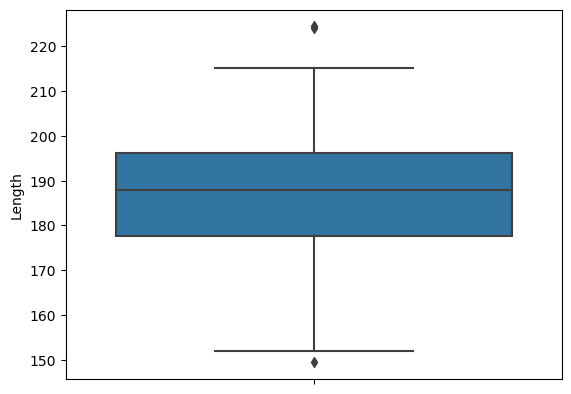

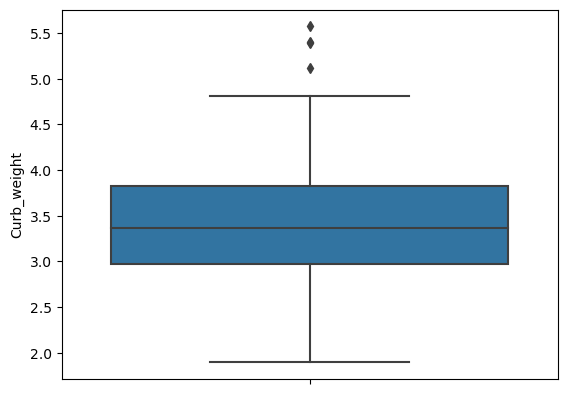

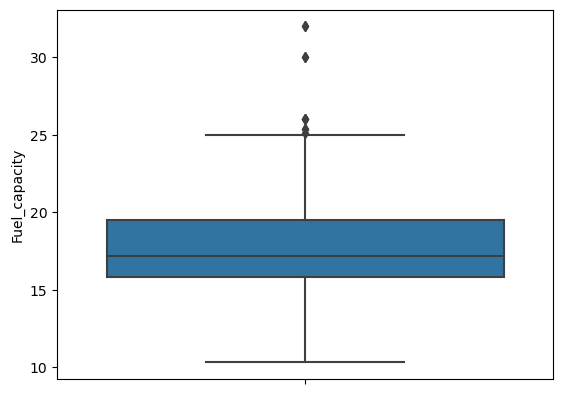

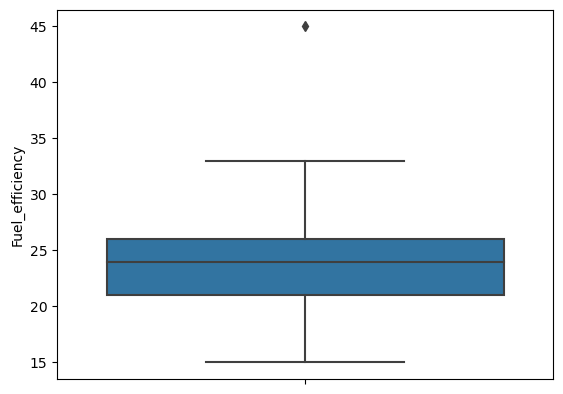

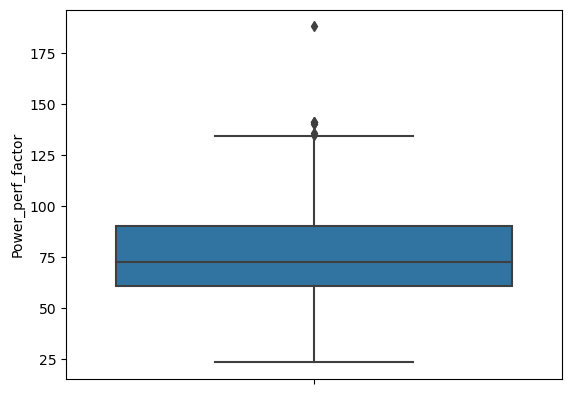

In [13]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(y=data[i])
        plt.show()

In [14]:
data['z_score']=stats.zscore(data.Price_in_thousands)

In [15]:
cleaned_data = data[data['z_score']<3]
cleaned_data.head()

,Manufacturer,Model,Sales_in_thousands,year_sale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,z_score
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,-0.418140
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,0.066824
2,Acura,CL,14.114,18.225,Passenger,35.20,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,91.380278,0.544761
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,1.022697
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,-0.243131


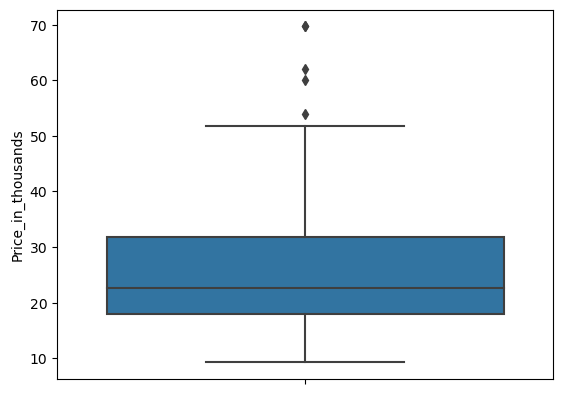

In [16]:
sns.boxplot(data=cleaned_data, y='Price_in_thousands');

In [17]:
data.drop(columns='z_score',inplace=True)

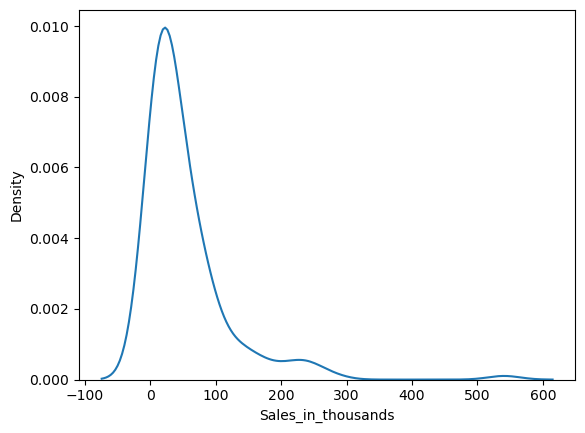

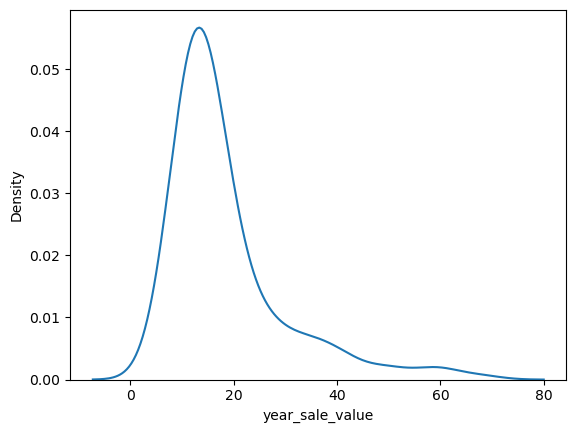

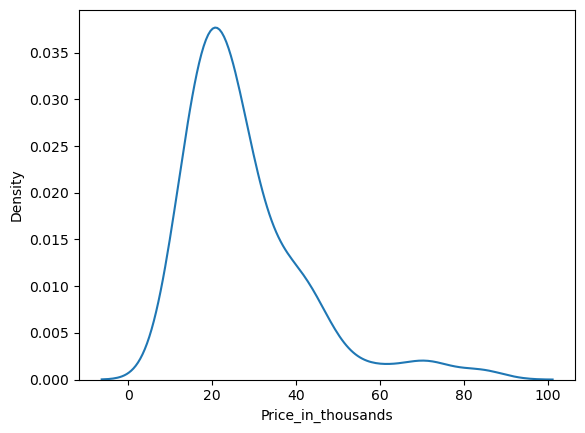

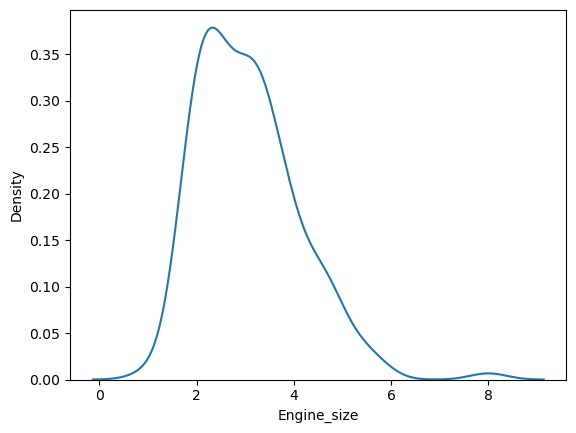

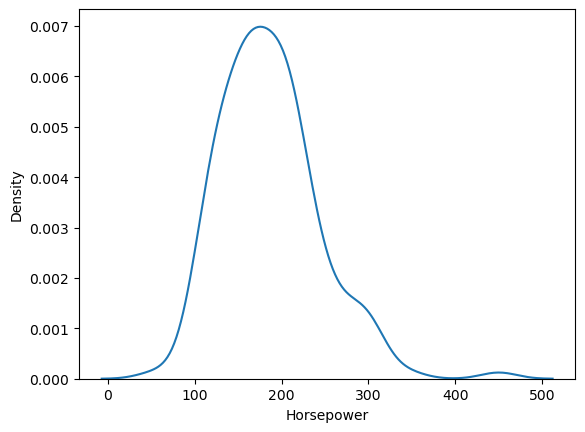

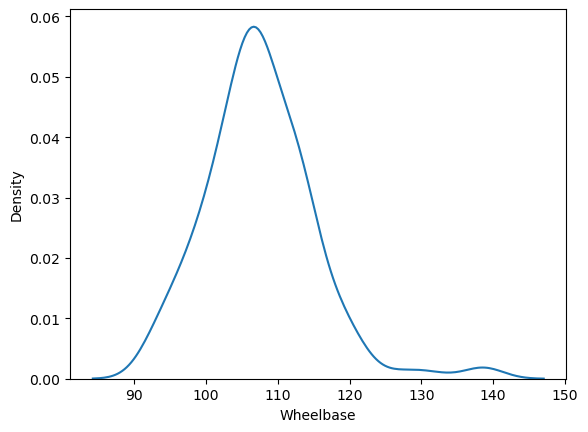

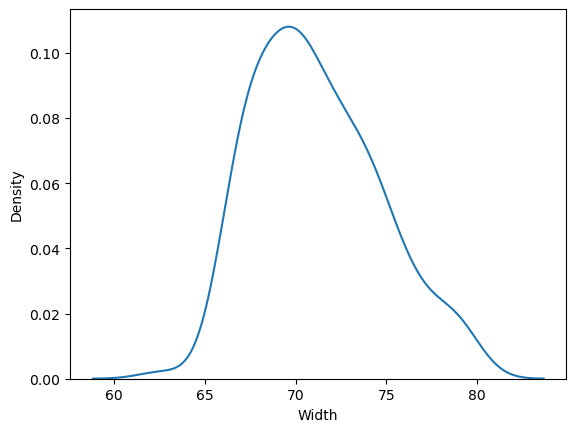

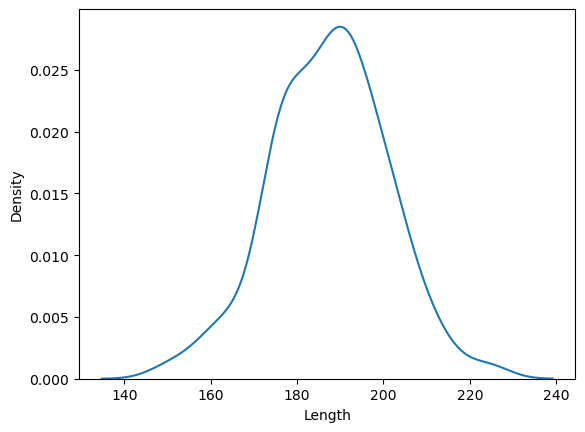

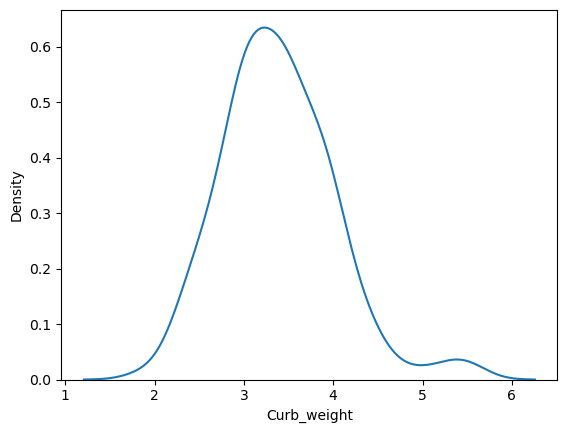

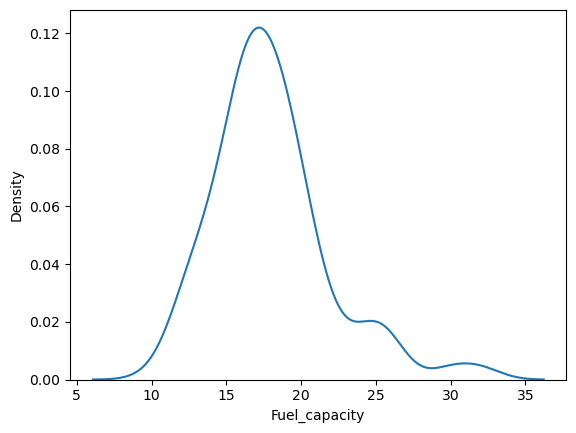

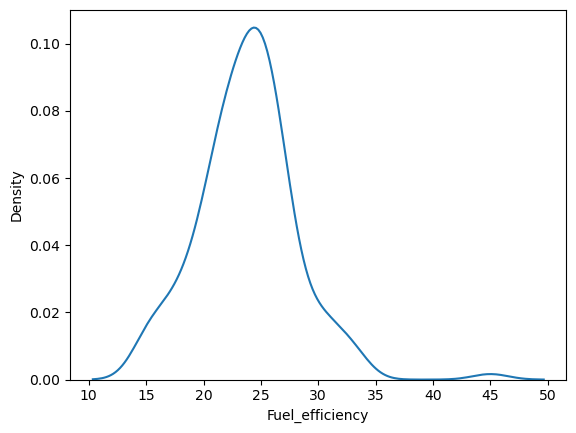

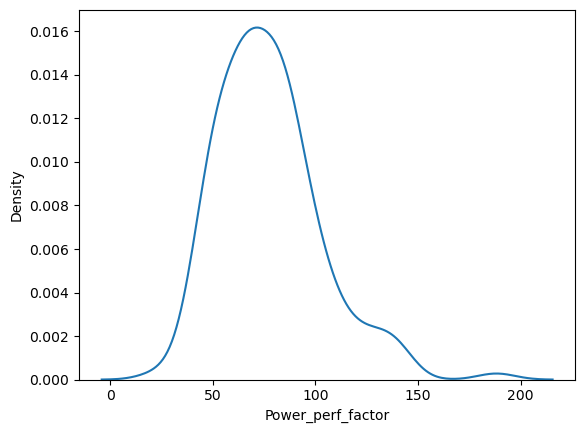

In [18]:
for i in data.columns:
    if data[i].dtypes != 'object':
        sns.kdeplot(x=data[i])
        plt.show()

#### Checking the correlation with the target 'Price_in_thousand'

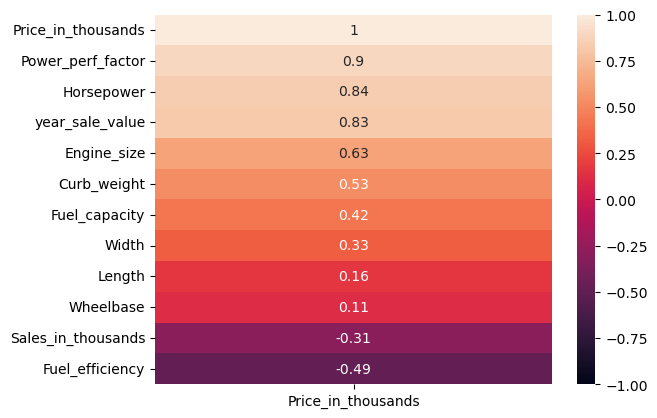

In [19]:
sns.heatmap(data.corr()[['Price_in_thousands']].sort_values(by='Price_in_thousands',ascending=False),vmin=-1,vmax=1,annot=True);

#### Lets take only the columns with good correlation with the target

In [20]:
x = data[['Power_perf_factor','Horsepower','year_sale_value','Engine_size']].values

In [21]:
y= data[['Price_in_thousands']]

#### Feature Scaling

In [22]:
rs = RobustScaler()

In [23]:
x = rs.fit_transform(x)

#### Model Building

In [24]:
models = {'LinearRegression':LinearRegression(),
         'Ridge':Ridge(),
         'LinearSVR':LinearSVR(),
         'DecisionTreeRegressor':DecisionTreeRegressor(),
         'GradientBoostingRegressor':GradientBoostingRegressor(),
         'AdaBoostRegressor':AdaBoostRegressor(),
         'RandomForestRegressor':RandomForestRegressor()}

In [25]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring = 'neg_mean_squared_error',cv = 10,n_jobs = -1)
    print('cross validation model:{}'.format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print('AVERAGE RMSE:', rmse_average)
    print('*'*100)

cross validation model:LinearRegression
AVERAGE RMSE: 0.2513200492080675
****************************************************************************************************
cross validation model:Ridge
AVERAGE RMSE: 3.859253319032226
****************************************************************************************************
cross validation model:LinearSVR
AVERAGE RMSE: 5.302703480087796
****************************************************************************************************
cross validation model:DecisionTreeRegressor
AVERAGE RMSE: 7.5973884077037495
****************************************************************************************************
cross validation model:GradientBoostingRegressor
AVERAGE RMSE: 5.966365173350075
****************************************************************************************************
cross validation model:AdaBoostRegressor
AVERAGE RMSE: 6.332894578953861
****************************************************************

#### We can see that "Linear Regression" is having the best overall perfomance so far. We may proceed with it.

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [27]:
model = LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
training_score = model.score(x_train,y_train)*100
testing_score = model.score(x_test,y_test)*100
score = r2_score(y_test,model.predict(x_test))*100
mae = mean_absolute_error(y_test,model.predict(x_test))
mse = mean_squared_error(y_test,model.predict(x_test))
print('r2score:',score)
print('training_score:',training_score)
print('testing_score:',testing_score)
print('mae:',mae)
print('mse:',mse)

r2score: 99.9963676959363
training_score: 99.76845611137053
testing_score: 99.9963676959363
mae: 0.08596748999959247
mse: 0.012481656860737867
